In [7]:
import pickle
import os
import numpy as np

In [8]:
#Reihenfolge ist freq, auth, mean
data = pickle.load(open('./Results/mutate_both/GunPoint/Mut_0.pkl','rb'))

In [9]:
np.array(data).shape

(500, 3)

In [12]:
datasetwise = {}
full_saver=[]
for data in os.listdir('./Results/mutate_both/'):
    #print(data)
    if os.path.isdir(f'./Results/mutate_both/{data}'):
        dw_saver=[]
        for item in os.listdir(f'./Results/mutate_both/{data}'):
            if item.startswith('Mut'):
                d = pickle.load(open(f'./Results/mutate_both/{data}/{item}','rb'))
                full_saver.append(d)
                dw_saver.append(d)
        datasetwise[data]=dw_saver


CBF
CBFOriginal_CF_Closest_0.png
CBFOriginal_CF_Closest_1.png
CBFOriginal_CF_Closest_10.png
CBFOriginal_CF_Closest_11.png
CBFOriginal_CF_Closest_12.png
CBFOriginal_CF_Closest_13.png
CBFOriginal_CF_Closest_14.png
CBFOriginal_CF_Closest_15.png
CBFOriginal_CF_Closest_16.png
CBFOriginal_CF_Closest_17.png
CBFOriginal_CF_Closest_18.png
CBFOriginal_CF_Closest_19.png
CBFOriginal_CF_Closest_2.png
CBFOriginal_CF_Closest_3.png
CBFOriginal_CF_Closest_4.png
CBFOriginal_CF_Closest_5.png
CBFOriginal_CF_Closest_6.png
CBFOriginal_CF_Closest_7.png
CBFOriginal_CF_Closest_8.png
CBFOriginal_CF_Closest_9.png
GunPointOriginal_CF_Closest_15.png
GunPointOriginal_CF_Closest_16.png
GunPointOriginal_CF_Closest_17.png
GunPointOriginal_CF_Closest_18.png
GunPointOriginal_CF_Closest_19.png
GunPointOriginal_CF_Closest_2.png
GunPointOriginal_CF_Closest_3.png
GunPointOriginal_CF_Closest_4.png
GunPointOriginal_CF_Closest_5.png
GunPointOriginal_CF_Closest_6.png
GunPointOriginal_CF_Closest_7.png
GunPointOriginal_CF_Closest

In [18]:
dataset = 'GunPoint'
np.array(datasetwise[dataset]).shape

(20, 500, 3)

In [75]:
dataset = 'GunPoint'
tr=np.array(datasetwise[dataset])
print(tr.shape)
means_freq=np.mean(tr,axis=0)
stds_freq = np.std(tr,axis=0)
print(means_freq.shape)
print(stds_freq.shape)

(20, 500, 3)
(500, 3)
(500, 3)


(500,)
(500,)


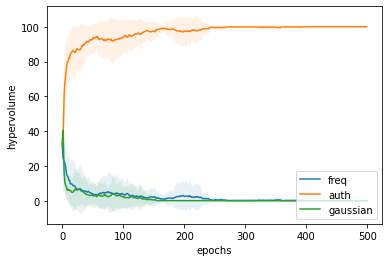

In [82]:
'''Plot Occurences per Dataset per Generation'''
dataset = 'GunPoint'
import matplotlib.pyplot as plt
dis=['freq', 'auth', 'gaussian']
i=0
print(means_freq[:,i].shape)
print(stds_freq[:,i].shape)
#means_freq=means_freq.reshape(3,-1)
#stds_freq=stds_freq.reshape(3,-1)
for i in range(0,3):
    plt.plot(range(0,500),means_freq[:,i].reshape(-1), label=f'{dis[i]}')
    #i=i+1
    plt.fill_between(range(500), means_freq[:,i] - stds_freq[:,i], means_freq[:,i] + stds_freq[:,i], alpha=.1)
plt.ylabel('hypervolume')
plt.xlabel('epochs')
plt.legend(loc=4)
#plt.save()

In [ ]:
'''Distribution Beginning vs Distribution End'''
'''Stacked Bar Plot every 100 Epochs ? '''


In [34]:
import seaborn as sns 

(20, 500, 3)
(20,)
(20,)
(20,)
(20,)
(20,)
EP  (300,)
TYP (300,)
a (300,)


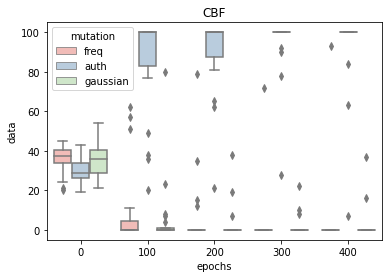

(20,)
(20,)
(20,)
(20,)
(20,)
EP  (300,)
TYP (300,)
a (300,)


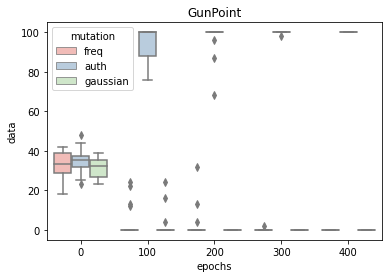

(20,)
(20,)
(20,)
(20,)
(20,)
EP  (300,)
TYP (300,)
a (300,)


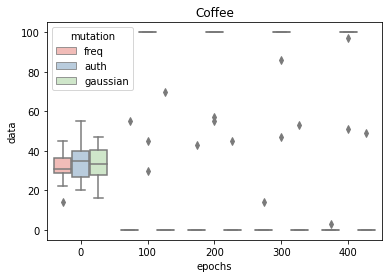

In [63]:
'''Boxplot every 100 Epochs ? '''
#TODO Somethings wrong with resgaping
import pandas as pd
print(np.array(datasetwise[dataset]).shape)
tr=np.array(datasetwise[dataset])#dataset#np.array(datasetwise[dataset]).reshape(3,20,500)
# Use every xth entry :
#print(tr.shape) 

for dataset in datasetwise.keys():
    tr=np.array(datasetwise[dataset])
    a=[]
    ep=[]
    typ=[]
    for i in range(0, 500):
        if i % 100 ==0: 
            print(np.array(tr[:,i,0]).shape)
            ep.extend(np.repeat(i, len(np.array(tr[:,i,0]).reshape(-1))))
            typ.extend(np.repeat('freq', len(np.array(tr[:,i,0]).reshape(-1))))
            a.extend(np.array(tr[:,i,0]).reshape(-1))
            ep.extend(np.repeat(i, len(np.array(tr[:,i,0]).reshape(-1))))
            typ.extend(np.repeat('auth', len(np.array(tr[:,i,0]).reshape(-1))))
            a.extend(np.array(tr[:,i,1]).reshape(-1))
            ep.extend(np.repeat(i, len(np.array(tr[:,i,0]).reshape(-1))))
            typ.extend(np.repeat('gaussian', len(np.array(tr[:,i,0]).reshape(-1))))
            a.extend(np.array(tr[:,i,2]).reshape(-1))

    print('EP ',np.array(ep).shape)
    print('TYP',np.array(typ).shape)
    print('a',np.array(a).shape)
    n=pd.DataFrame([])
    n['data']=a
    n['mutation']=typ
    n['epochs']=ep
    #n['freq']=test[0]
    #n['auth']=test[1]
    #n['gaussian']=test[2]
    sns.boxplot(x="epochs", y="data", hue="mutation", data=n, palette="Pastel1")
    plt.title(f'{dataset}')
    plt.show()
    plt.close()